# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [2]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

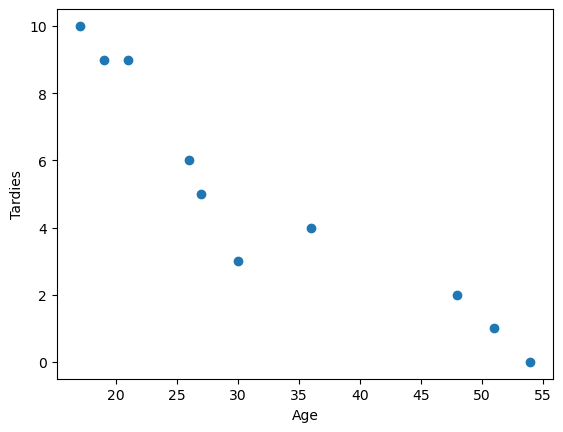

In [3]:
# Your code here.
plt.scatter(x=student_data.Age, y=student_data.Tardies)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# There could be a negative correlation between ages and number of tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
correlation_student_data = student_data.Age.corr(student_data.Tardies, method='pearson')

#covariance:
covariance_student_data = student_data.Age.cov(student_data.Tardies)

print(correlation_student_data, covariance_student_data)

#The covariance measures if two variables varies together. This values shows a negative covariance, so when a variable increases the other one decreases.
#The correlation if there is a linear relationship between the variables (as we are using Person's method), how strong it is and if it is positive or negative.
#This result show a very strong negative correlation.


-0.9391626886887122 -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [7]:
model = linear_model.LinearRegression()

In [8]:
# X-y split
X = student_data.drop('Tardies', axis=1)
y = student_data['Tardies']

X.head()

Age
0   17
1   51
2   27
3   21
4   36

In [9]:
# Fit model
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 12.888803363135768
Coefficient: [-0.24282077]


Plot your regression model on your scatter plot.

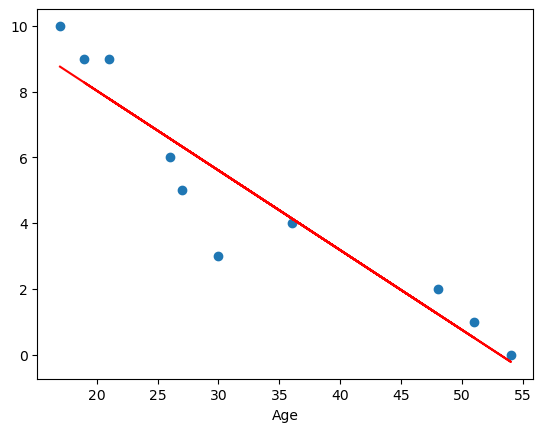

In [10]:
# Your code here.
# Create regression line equation
regression_line = result.intercept_ + student_data.Age * result.coef_
plt.plot(student_data.Age, regression_line, c='red')

# Add line plot and scatter plot
plt.scatter(student_data.Age, student_data.Tardies)
plt.xlabel('Age')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here. 
model.score(X, y)

#the r^2 score measures how well the model can represent the correlation betwwen the data and it is used to evaluate the prediction capability of the model.
#The score varies from 0 to 1: our value shows that the model can explain 88% of the data and therefore has a very good predictive capacity.
#From this model, we could say that age is a very good predictor of tardiness (if we don't consider that our data sample was very small...)

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly. express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 
vehicles = pd.read_csv('vehicles.csv')
vehicles.sample(5)

Make                 Model  Year  Engine Displacement  Cylinders  \
1937        BMW           335i xDrive  2013                  3.0        6.0   
16334       GMC  T15 (S15) Pickup 4WD  1984                  2.8        6.0   
4039   Cadillac          Escalade 2WD  2008                  6.2        8.0   
16261       GMC            Sonoma 4WD  1996                  4.3        6.0   
13044      Ford       F250 Pickup 2WD  1985                  4.9        6.0   

          Transmission                  Drivetrain  \
1937    Automatic (S8)             All-Wheel Drive   
16334  Automatic 4-spd  4-Wheel or All-Wheel Drive   
4039   Automatic 6-spd            Rear-Wheel Drive   
16261  Automatic 4-spd  4-Wheel or All-Wheel Drive   
13044     Manual 4-spd            Rear-Wheel Drive   

                     Vehicle Class Fuel Type  Fuel Barrels/Year  City MPG  \
1937                  Compact Cars   Premium          13.733750        20   
16334   Standard Pickup Trucks 4WD   Regular          18.311667        16   
4039   Sport Utility Vehicle - 2WD   Premium          23.543571        12   
16261       Standard Pickup Trucks   Regular          19.388824        15   
13044       Standard Pickup Trucks   Regular          20.600625        15   

       Highway MPG  Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
1937            30            24               377.000000            1700  
16334           22            18               493.722222            1850  
4039            19            14               634.785714            2900  
16261           20            17               522.764706            1950  
13044           17            16               555.437500            2100

In [14]:
cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_s = vehicles[cols]
vehicles_s

Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
0      1984        4.0          19.388824            17            1950   
1      1984        6.0          25.354615            13            2550   
2      1985        4.0          20.600625            16            2100   
3      1985        6.0          25.354615            13            2550   
4      1987        6.0          20.600625            16            2550   
...     ...        ...                ...           ...             ...   
35947  2013        3.0           9.155833            36            1100   
35948  2014        3.0           9.155833            36            1100   
35949  2015        3.0           9.155833            36            1100   
35950  2016        3.0           9.155833            36            1100   
35951  2016        3.0           9.417429            35            1150   

       CO2 Emission Grams/Mile  
0                   522.764706  
1                   683.615385  
2                   555.437500  
3                   683.615385  
4                   555.437500  
...                        ...  
35947               244.000000  
35948               243.000000  
35949               244.000000  
35950               246.000000  
35951               255.000000  

[35952 rows x 6 columns]

In [15]:
vehicles_s.isna().sum()

Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

In [16]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [17]:
# Use plotly to create a figure with n rows and 2 columns
from plotly.subplots import make_subplots
fig = make_subplots(rows=vehicles_s.shape[1], cols=2)

# Create a loop for histogram plots
for i, col in enumerate(vehicles_s.columns):
    fig.add_trace(go.Histogram(x=vehicles_s[col], name=col), row=i+1, col=1)

# Create a loop for box plots
for i, col in enumerate(vehicles_s.columns):
    fig.add_trace(go.Box(x=vehicles_s[col], name=col), row=i+1, col=2)

# Adjust the height, width, and title of the layout
fig.update_layout(height=200 * vehicles_s.shape[1], width=1100, title_text="Target vs Feature distributions")
fig.show()

In [18]:
vehicles_s.corr()

Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile        0.930865                 1.000000

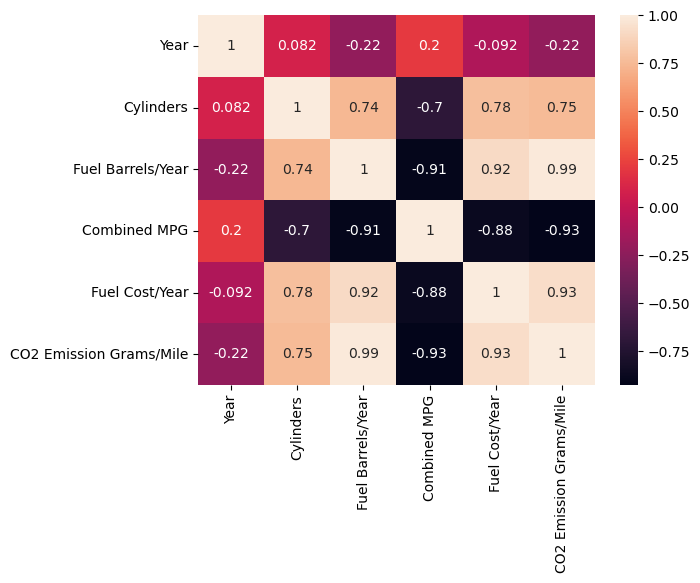

In [19]:
sns.heatmap(vehicles_s.corr(), annot=True)
plt.show()

In [20]:
#The highest positive correlation with our target avriable CO2 Emission can be seen in Fuel Barrels/Year (the correlation is 0.99 - very close to 1 in our heatmap and the plots look also very much alike.
#There is also a high positive correlation between Fuel Cost/Year and our target variable, but since Fuel Barrels and Fuel Cost are dependent from each other, this does not add new information.
#Combined MPG has also a strong negative correlation with CO2 Emission. This makes sense if we look at what the variables represent: the highest is the fuel consumption of a car (Fuel Barrels), more CO2 the car will release in the air.
#Combined MPG measures how efficient is a car in the combined routes (highway and city): if the value is high the car will consume less fuel and as a consequence emit less CO2.
#Year is the least correlated variable (around -0.22 - mild negative correlation).

In [21]:
# Remove highly correlated features
vehicles_s.drop(columns='Fuel Cost/Year', axis=1, inplace=True)

C:\Users\zluca\AppData\Local\Temp\ipykernel_21536\1343278944.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Remove Year, which has a very small correlation
vehicles_s.drop(columns='Year', axis=1, inplace=True)

C:\Users\zluca\AppData\Local\Temp\ipykernel_21536\337424029.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
vehicles_s

Cylinders  Fuel Barrels/Year  Combined MPG  CO2 Emission Grams/Mile
0            4.0          19.388824            17               522.764706
1            6.0          25.354615            13               683.615385
2            4.0          20.600625            16               555.437500
3            6.0          25.354615            13               683.615385
4            6.0          20.600625            16               555.437500
...          ...                ...           ...                      ...
35947        3.0           9.155833            36               244.000000
35948        3.0           9.155833            36               243.000000
35949        3.0           9.155833            36               244.000000
35950        3.0           9.155833            36               246.000000
35951        3.0           9.417429            35               255.000000

[35952 rows x 4 columns]

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
# Your response here. 
from sklearn.preprocessing import StandardScaler
vehicles_s_scaled = pd.DataFrame(StandardScaler().fit_transform(vehicles_s), columns=vehicles_s.columns)
vehicles_s_scaled.describe().style.format('{:.2f}')

In [25]:
# Your response here. 
X = vehicles_s_scaled.drop('CO2 Emission Grams/Mile', axis=1)
y = vehicles_s_scaled['CO2 Emission Grams/Mile']

In [26]:
model = linear_model.LinearRegression()
result = model.fit(X, y)

In [27]:
# Calculate coefficients
coef = model.coef_
intercept = model.intercept_
print(coef)
print(intercept)

[ 0.04168798  0.80772437 -0.16228248]
-3.4595457233516874e-16


In [28]:
predictions = result.predict(X)
predictions

array([ 0.37286721,  1.62602462,  0.62371802, ..., -2.10424726,
       -2.10424726, -2.02520456])

In [32]:
# Calculate MSE and MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_OG = mean_squared_error(vehicles_s_scaled['CO2 Emission Grams/Mile'], predictions)
MAE_OG = mean_absolute_error(vehicles_s_scaled['CO2 Emission Grams/Mile'], predictions)

print('OG MSE:', MSE_OG)
print('OG MAE:', MAE_OG)

OG MSE: 0.021754908376017262
OG MAE: 0.052554257068572315


In [33]:
r2 = result.score(X, y)
r2

0.9782450916239828

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
# To identify the most important variables in a multivariable regression model, we can look at the coefficients and at their relations to the intercept.
# Coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable while holding all other independent variables constant. 
# By adding the intercept,  we can see the effect of each variable relative to the baseline of the regression model (intercept).

coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coef})
intercept_df = pd.DataFrame({'Variable': ['Intercept'], 'Coefficient': [model.intercept_]})
coefficients_df = pd.concat([intercept_df, coefficients_df], ignore_index=True)

# Sort the coefficients by absolute value to see the most important ones
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the sorted coefficients
display(coefficients_df)

# Variables with larger coefficients have a stronger impact on the target variable.The intercept represents the value of 'CO2 Emissions' for a hypothetical situation where all independent variables have values of zero.
# Since here it is very small (close to 0), we can conclude that the intercept idoes not affect the way this model predicts our data.

Variable   Coefficient  Absolute_Coefficient
2  Fuel Barrels/Year  8.077244e-01          8.077244e-01
3       Combined MPG -1.622825e-01          1.622825e-01
1          Cylinders  4.168798e-02          4.168798e-02
0          Intercept -3.459546e-16          3.459546e-16

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.
party_people = pd.DataFrame({'people_invited': [1, 3, 4, 6, 8, 9, 11, 14], 'people_attending': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

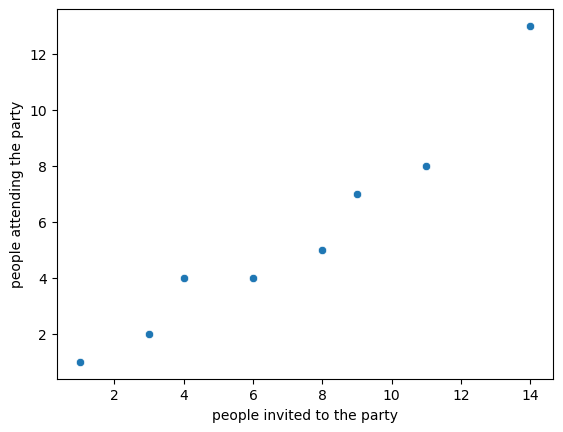

In [ ]:
# Your code here.
sns.scatterplot(x=party_people.people_invited, y=party_people.people_attending)
plt.xlabel('people invited to the party')
plt.ylabel('people attending the party')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# The plot suggests that there might be a positive correlation between the the number of people invited.
model = linear_model.LinearRegression()
X = party_people.drop('people_attending', axis=1)
y = party_people.people_attending

X

people_invited
0               1
1               3
2               4
3               6
4               8
5               9
6              11
7              14

In [ ]:
# Your response here. 
result = model.fit(X, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: -0.43939393939393945
Coefficient: [0.84848485]


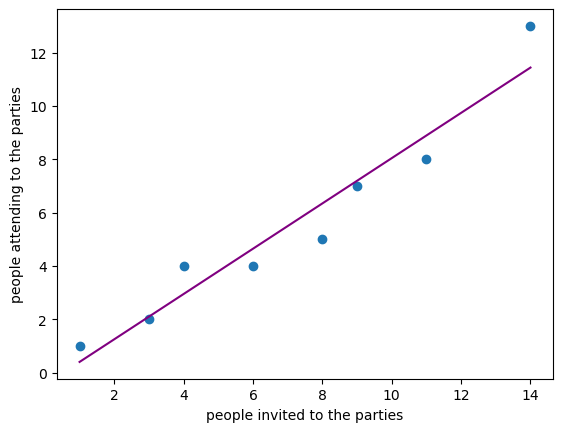

In [ ]:
regression_line = result.intercept_ + party_people.people_invited * result.coef_
plt.plot(party_people.people_invited, regression_line, c='purple')

plt.scatter(party_people.people_invited, party_people.people_attending)
plt.xlabel('people invited to the parties')
plt.ylabel('people attending to the parties')
plt.show()

In [ ]:
regression_line

0     0.409091
1     2.106061
2     2.954545
3     4.651515
4     6.348485
5     7.196970
6     8.893939
7    11.439394
Name: people_invited, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = result.intercept_ + party_people.people_invited * result.coef_
MSE_OG = mean_squared_error(party_people.people_invited, predictions)
print(predictions)
print('OG MSE:', MSE_OG)

0     0.409091
1     2.106061
2     2.954545
3     4.651515
4     6.348485
5     7.196970
6     8.893939
7    11.439394
Name: people_invited, dtype: float64
OG MSE: 2.628787878787879


In [ ]:
model.score(X, y) #this result is very high, so it seems the model shows correctly a strong positive correlation between number of people invited to the parties and number of people actually attending.

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.
condition = (party_people.people_invited == 14)
filtered_people = party_people.loc[~condition]
filtered_people

people_invited  people_attending
0               1                 1
1               3                 2
2               4                 4
3               6                 4
4               8                 5
5               9                 7
6              11                 8

In [ ]:
model = linear_model.LinearRegression()
X = filtered_people.drop('people_attending', axis=1)
y = filtered_people.people_attending
X

people_invited
0               1
1               3
2               4
3               6
4               8
5               9
6              11

In [ ]:
result = model.fit(X, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 0.32330827067669077
Coefficient: [0.68421053]


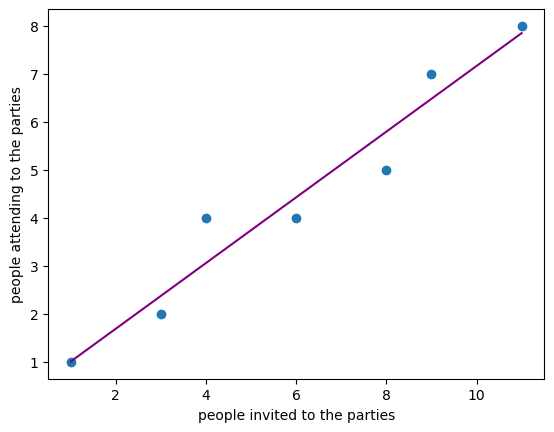

In [ ]:
regression_line = result.intercept_ + filtered_people.people_invited * result.coef_
plt.plot(filtered_people.people_invited, regression_line, c='purple')

plt.scatter(filtered_people.people_invited, filtered_people.people_attending)
plt.xlabel('people invited to the parties')
plt.ylabel('people attending to the parties')
plt.show()

In [ ]:
predictions_2 = result.intercept_ + filtered_people.people_invited * result.coef_
MSE_OG_2 = mean_squared_error(filtered_people.people_invited, predictions_2)
print(predictions_2)
print('OG MSE 2:', MSE_OG_2)
print('Does my model better without outliers?', MSE_OG_2 < MSE_OG)

0    1.007519
1    2.375940
2    3.060150
3    4.428571
4    5.796992
5    6.481203
6    7.849624
Name: people_invited, dtype: float64
OG MSE 2: 3.552094522019334
Does my model better without outliers? False


In [ ]:
model.score(X, y)

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#The second model for the filtered dataframe has a higher r^2 score, which means that explains better the correlation between our data.
#This model has however a higher MSE (mean squared error): that means that the model produces predictions that on average are further from the actual data than those of the first model.
#I am not sure if I made a mistake or if these values show that the customization of the data frame in order to improve the predictability had lead me to overfit the model to my current data,
#inficiating its performance in predicting other clusters of data (thus the highest MSE score). This seems a possibility...it would be nice to have a feedback on this conclusion. Thank you!